In [1]:
import os
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Paths and parameters
data_dir = './../../dataset/raw_data/train'  # Your dataset path (5 subfolder classes)
run_folder = 'results/run1'        # Results folder (run1, run2,... etc.)

batch_size = 16
num_epochs = 10
LR = 1e-5

image_size = 224 

# Ensure run_folder exists
if not os.path.exists(run_folder):
    os.makedirs(run_folder)

In [4]:
# Transformations: Random crop for training, Resize for validation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
# Load the dataset
dataset = datasets.ImageFolder(root=data_dir)

# Ensure the dataset classes are in the correct order (1, 2, 3, 4, 5)
dataset.classes.sort(key=lambda x: int(x))  # Sort the class names numerically if they are numeric strings

# Create a mapping from numerical labels to class names
label_to_class_name = {idx: class_name for idx, class_name in enumerate(dataset.classes)}

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Assign transformations
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [6]:
# # Load ResNet-50 with pretrained weights
# model = models.resnet50(pretrained=True)

In [96]:
# #resnet18
# model = models.resnet18(pretrained=True)

In [97]:
# # Load ResNet-101 with pretrained weights
# model = models.resnet101(pretrained=True)

In [124]:
# Load ResNet-152 with pretrained weights
model = models.resnet152(pretrained=True)

/home/user/miniconda3/envs/torch_pk/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/miniconda3/envs/torch_pk/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /home/user/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [128]:
# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the number of output classes
num_class = 5
num_features = model.fc.in_features

# Replace the final classification layer
model.fc = nn.Linear(num_features, num_class)

In [129]:
model = model.to(device)

class_counts = [414,478,856,1034,426] # aug-mix
#class_counts = [277,324,581,703,291]

total_samples = sum(class_counts)
class_weights = [total_samples / (len(class_counts) * count) for count in class_counts]
class_weights = torch.FloatTensor(class_weights).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=1e-4)

In [130]:
# Training parameters
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

Epoch 1/25, Train Loss: 1.1922, Train Acc: 56.72%, Val Loss: 1.1993, Val Acc: 54.82%


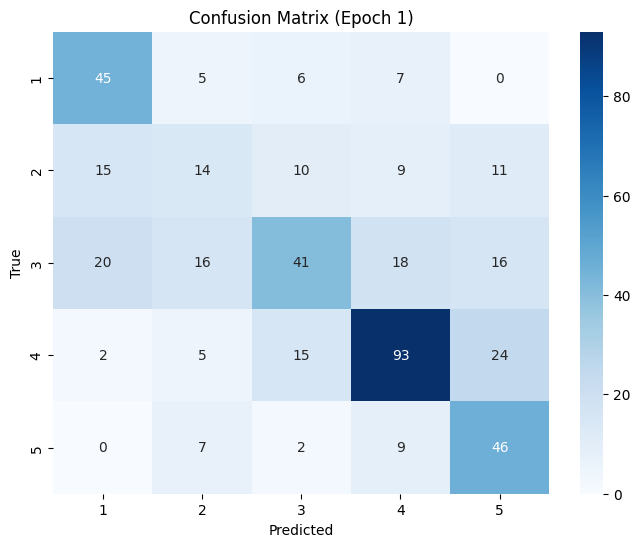

Epoch 2/25, Train Loss: 1.1917, Train Acc: 58.05%, Val Loss: 1.2014, Val Acc: 53.67%


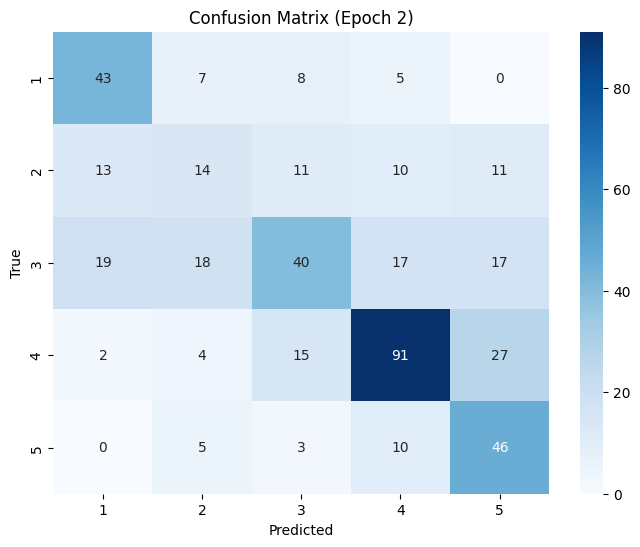

Epoch 3/25, Train Loss: 1.1899, Train Acc: 57.99%, Val Loss: 1.1967, Val Acc: 55.28%


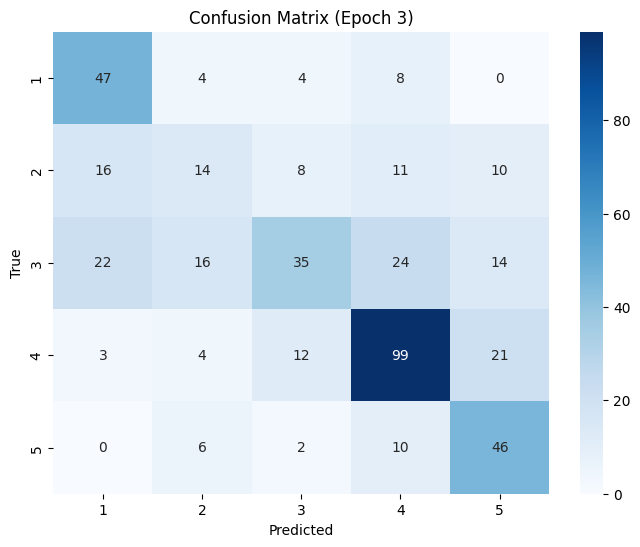

Epoch 4/25, Train Loss: 1.1979, Train Acc: 55.92%, Val Loss: 1.1996, Val Acc: 54.13%


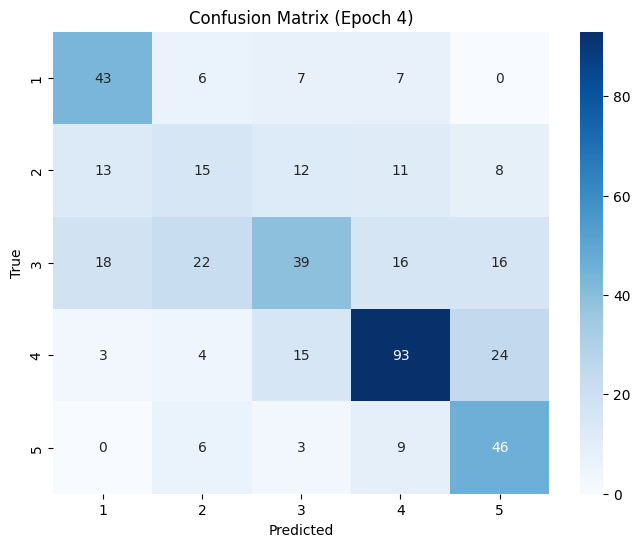

Epoch 5/25, Train Loss: 1.1863, Train Acc: 55.17%, Val Loss: 1.1929, Val Acc: 53.90%


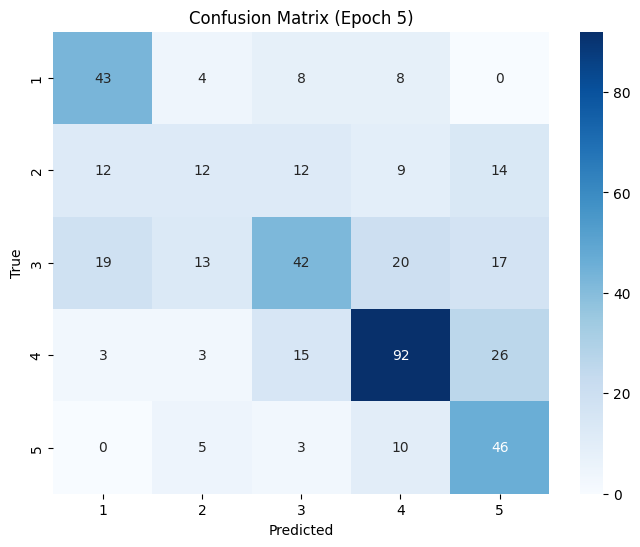

Epoch 6/25, Train Loss: 1.1862, Train Acc: 56.61%, Val Loss: 1.1893, Val Acc: 54.82%


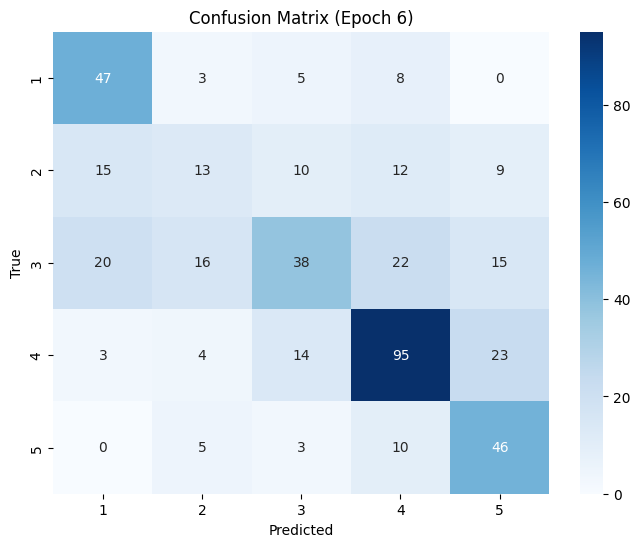

Epoch 7/25, Train Loss: 1.1840, Train Acc: 56.38%, Val Loss: 1.1930, Val Acc: 54.59%


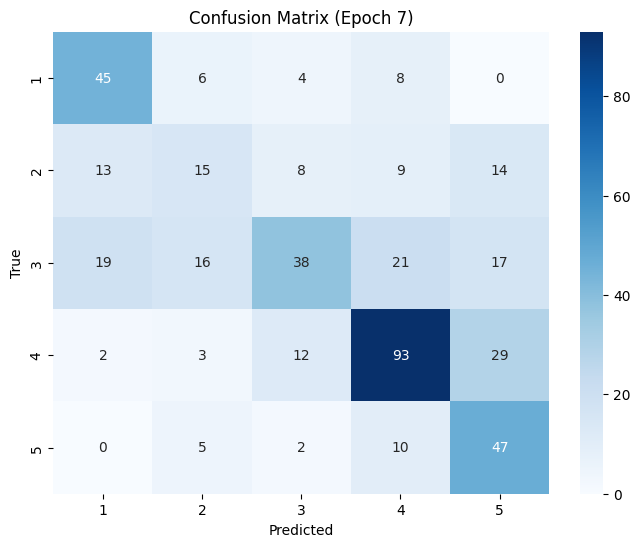

Epoch 8/25, Train Loss: 1.1829, Train Acc: 56.84%, Val Loss: 1.1922, Val Acc: 55.05%


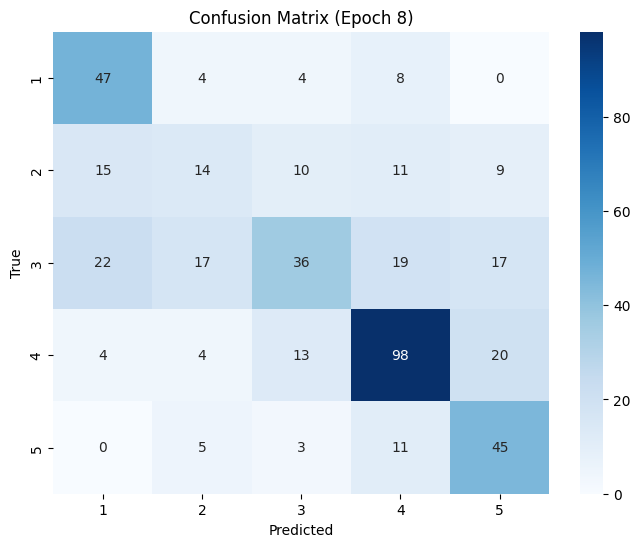

Epoch 9/25, Train Loss: 1.1851, Train Acc: 57.53%, Val Loss: 1.1898, Val Acc: 55.28%


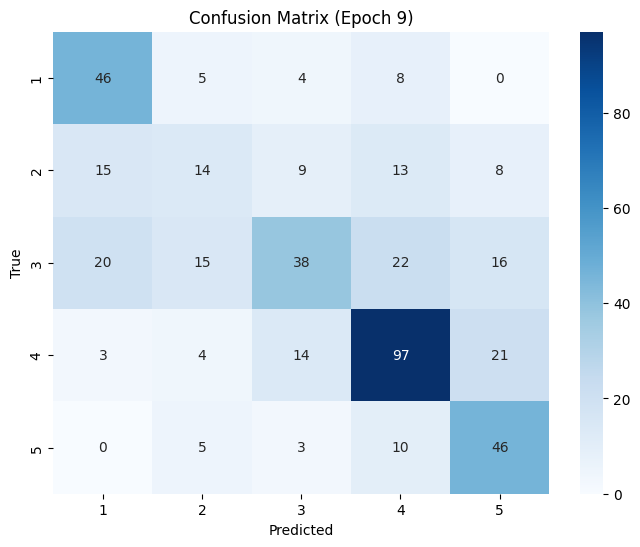

Epoch 10/25, Train Loss: 1.1887, Train Acc: 56.15%, Val Loss: 1.1867, Val Acc: 54.82%


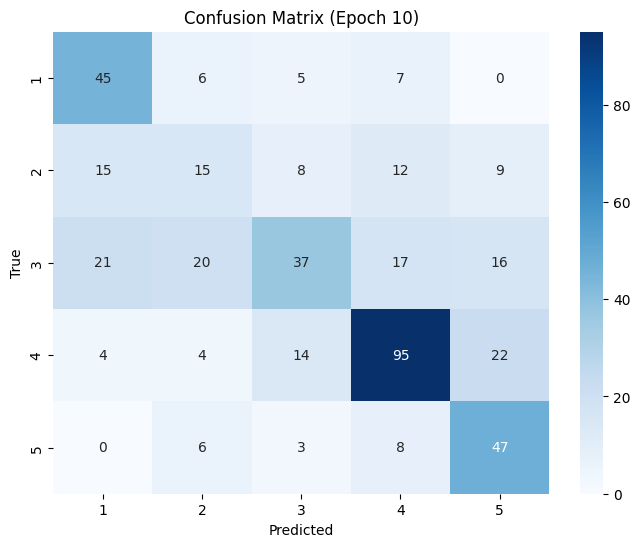

Epoch 11/25, Train Loss: 1.1772, Train Acc: 56.90%, Val Loss: 1.1843, Val Acc: 54.36%


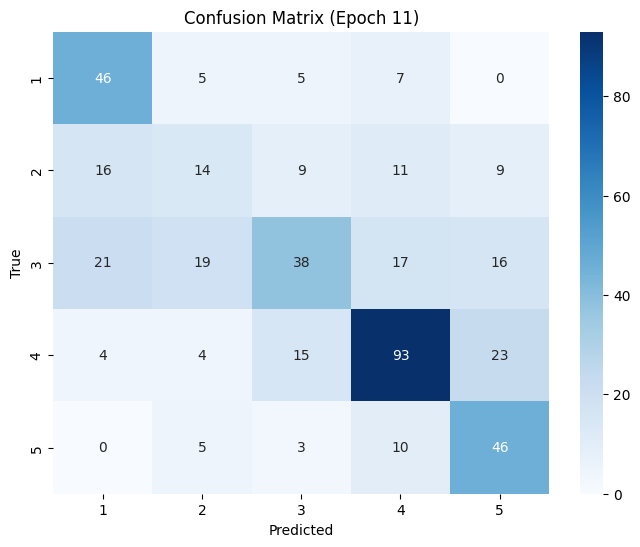

Epoch 12/25, Train Loss: 1.1797, Train Acc: 57.30%, Val Loss: 1.1849, Val Acc: 54.36%


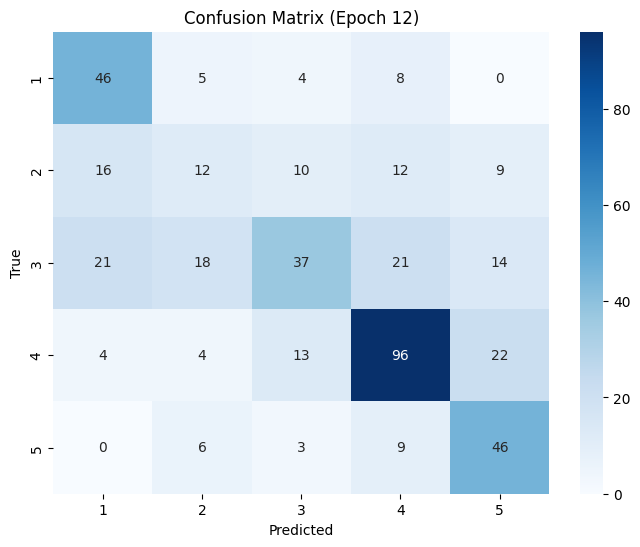

Epoch 13/25, Train Loss: 1.1706, Train Acc: 58.22%, Val Loss: 1.1863, Val Acc: 54.13%


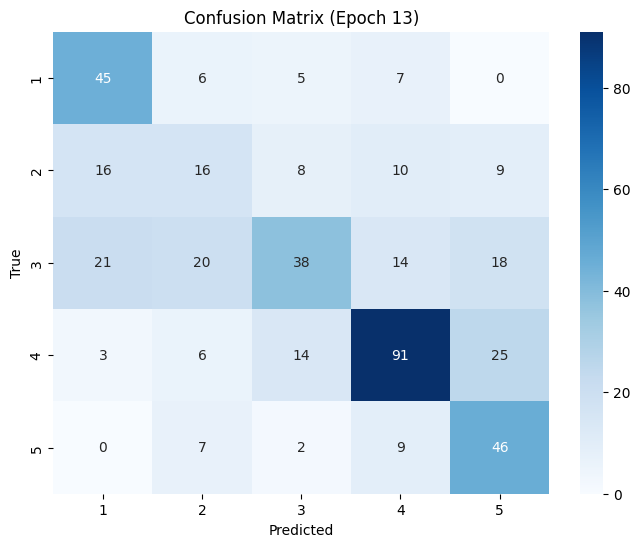

Epoch 14/25, Train Loss: 1.1793, Train Acc: 57.59%, Val Loss: 1.1794, Val Acc: 54.59%


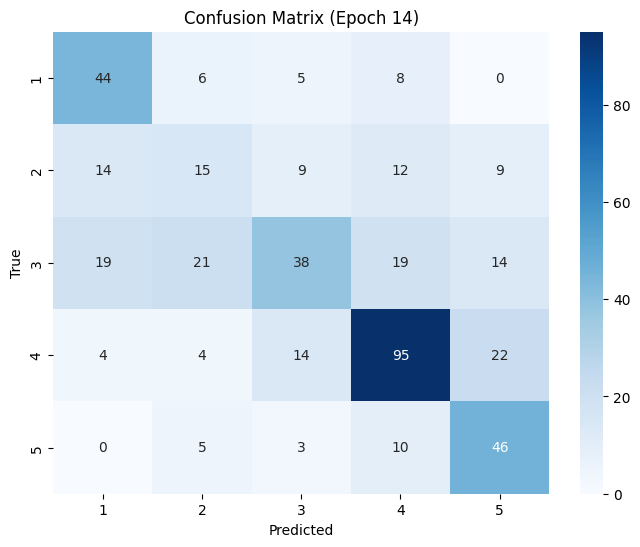

Epoch 15/25, Train Loss: 1.1674, Train Acc: 56.90%, Val Loss: 1.1778, Val Acc: 55.05%


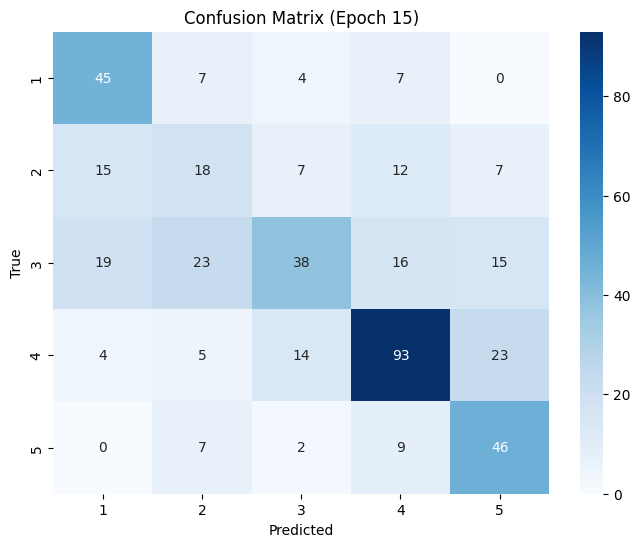

Epoch 16/25, Train Loss: 1.1745, Train Acc: 57.18%, Val Loss: 1.1817, Val Acc: 53.90%


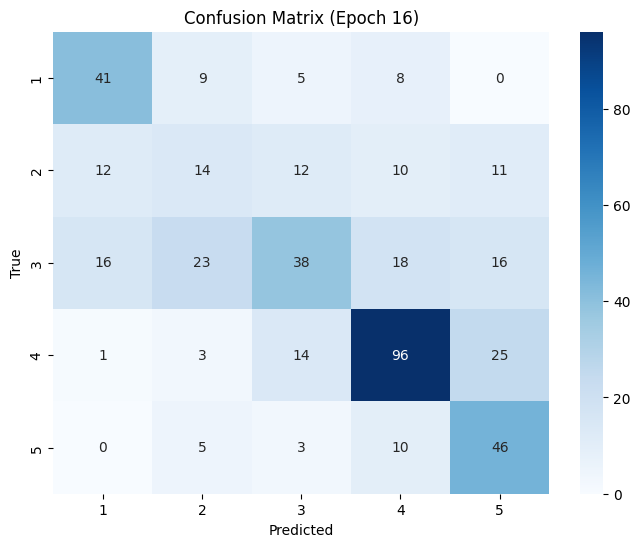

Epoch 17/25, Train Loss: 1.1684, Train Acc: 57.59%, Val Loss: 1.1763, Val Acc: 53.90%


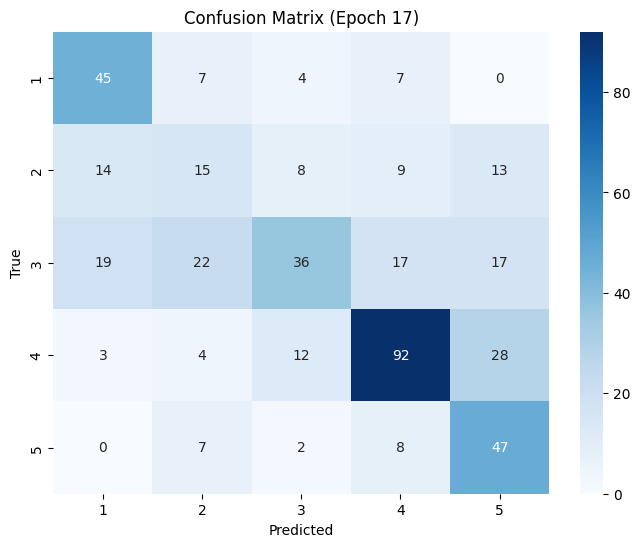

Epoch 18/25, Train Loss: 1.1636, Train Acc: 56.55%, Val Loss: 1.1708, Val Acc: 54.82%


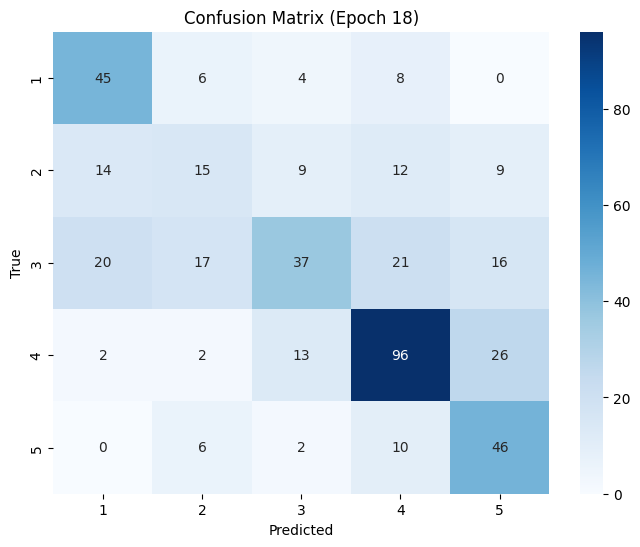

Epoch 19/25, Train Loss: 1.1578, Train Acc: 57.70%, Val Loss: 1.1744, Val Acc: 54.82%


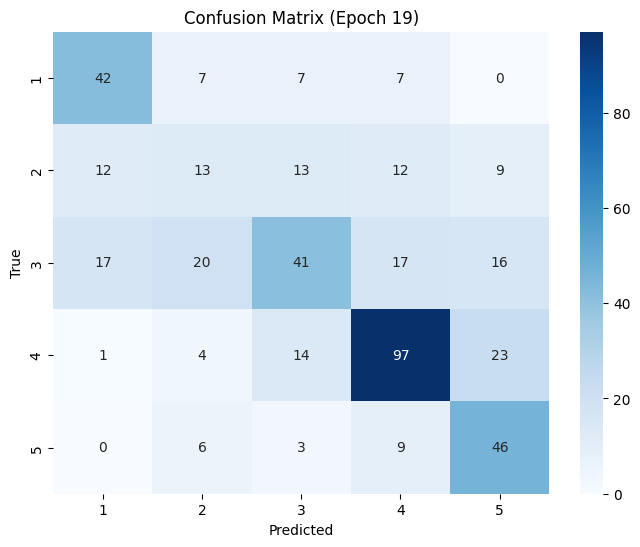

Epoch 20/25, Train Loss: 1.1670, Train Acc: 56.55%, Val Loss: 1.1705, Val Acc: 55.28%


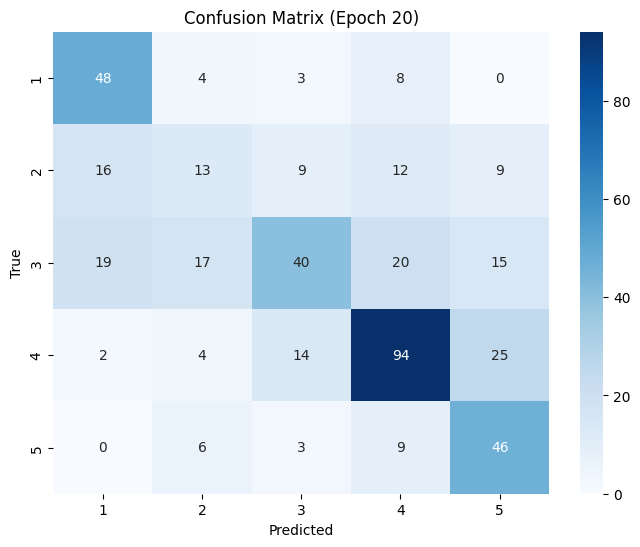

Epoch 21/25, Train Loss: 1.1572, Train Acc: 58.05%, Val Loss: 1.1733, Val Acc: 54.82%


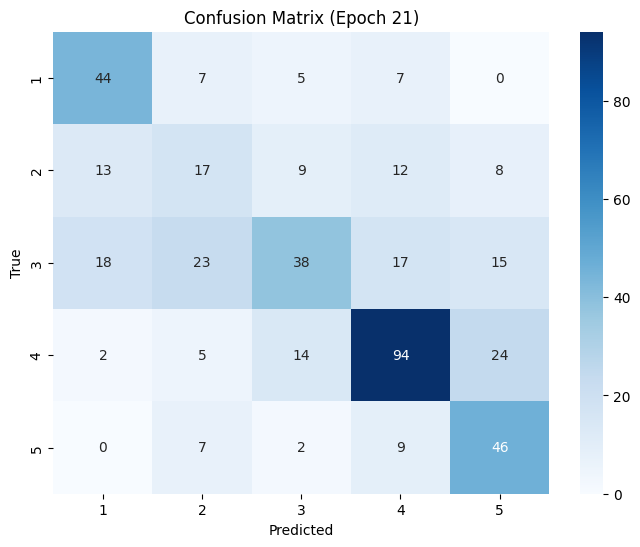

Epoch 22/25, Train Loss: 1.1634, Train Acc: 56.90%, Val Loss: 1.1725, Val Acc: 55.05%


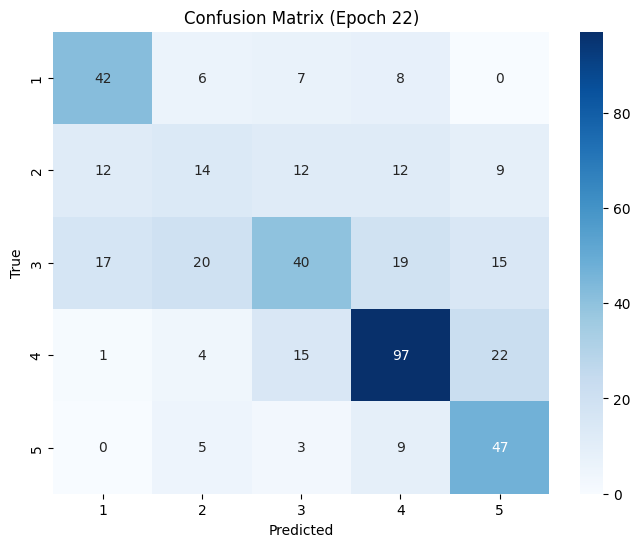

Epoch 23/25, Train Loss: 1.1511, Train Acc: 58.51%, Val Loss: 1.1745, Val Acc: 54.82%


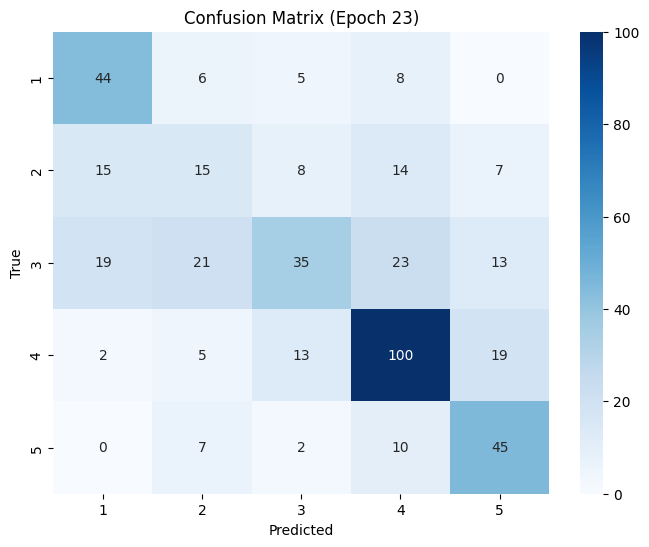

Epoch 24/25, Train Loss: 1.1546, Train Acc: 57.59%, Val Loss: 1.1691, Val Acc: 55.28%


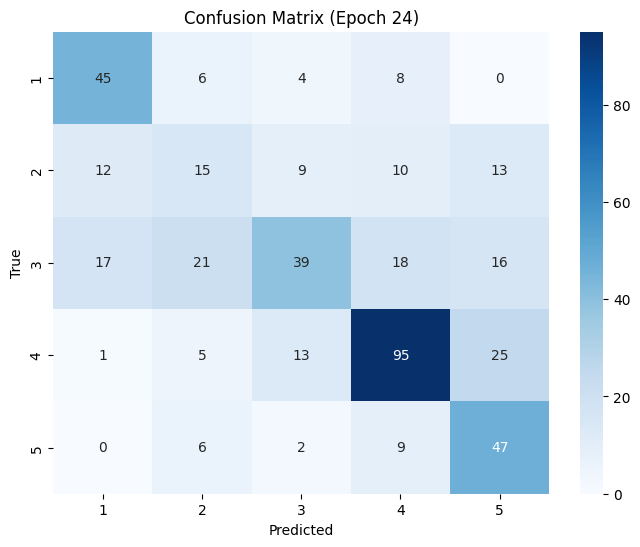

Epoch 25/25, Train Loss: 1.1615, Train Acc: 57.53%, Val Loss: 1.1711, Val Acc: 55.05%


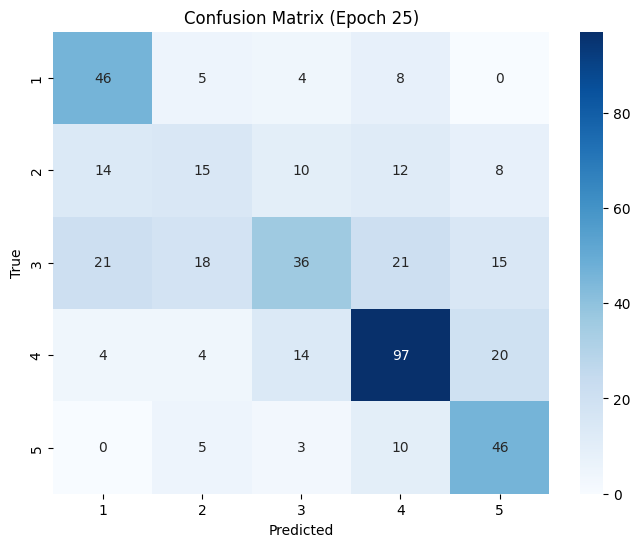

In [136]:
# Early stopping parameters
patience = 5  # Number of epochs to wait before stopping
best_val_loss = float('inf')
patience_counter = 0

# Training and validation loop
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track training loss and accuracy
        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track validation loss and accuracy
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss = running_val_loss / len(val_loader)
    val_acc = 100 * correct_val / total_val
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    # Print metrics for this epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset counter if validation loss improved
    else:
        patience_counter += 1  # Increment counter if no improvement

    if patience_counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs.')
        break

    # Confusion matrix for validation set
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Epoch {epoch + 1})')
    
    plt.show()
    #print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%')


ValueError: x and y must have same first dimension, but have shapes (25,) and (100,)

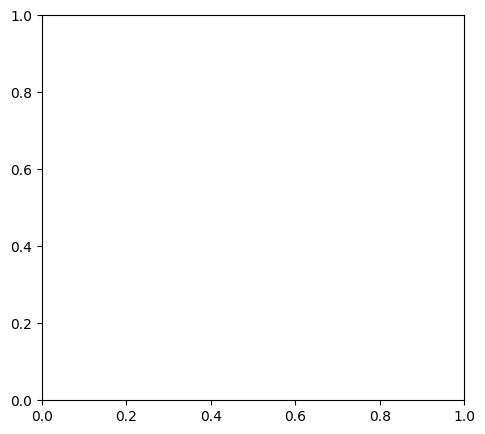

In [137]:
# Plot loss and accuracy
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_history, label='Training Loss')
plt.plot(epochs_range, val_loss_history, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plt.savefig(os.path.join(run_folder, 'accuracy_graph.png'))
# plt.close()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# plt.savefig(os.path.join(run_folder, 'loss_graph.png'))
# plt.close()

plt.show()

In [138]:
# Final classification report after all epochs
print("Final Classification Report:")
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print(report)

Final Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.73      0.62        63
           2       0.32      0.25      0.28        59
           3       0.54      0.32      0.40       111
           4       0.66      0.70      0.68       139
           5       0.52      0.72      0.60        64

    accuracy                           0.55       436
   macro avg       0.51      0.55      0.52       436
weighted avg       0.54      0.55      0.53       436



In [139]:
#Save the report to a text file
with open("class_resnet152.txt", "w") as f:
    f.write(report)

In [140]:
cm = confusion_matrix(all_labels, all_preds)

print("Confusion Matrix:\n", cm)

# Check if the confusion matrix is not blank (contains any non-zero values)
if cm.sum() > 0:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                 xticklabels=dataset.classes, 
                 yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Epoch {epoch + 1})')
    # Save the confusion matrix plot
    plt.savefig(os.path.join('conf_resnet152.png'), bbox_inches='tight')
    plt.close()  # Close the figure to free memory
else:
    print("Confusion matrix is blank. Not saving.")

Confusion Matrix:
 [[46  5  4  8  0]
 [14 15 10 12  8]
 [21 18 36 21 15]
 [ 4  4 14 97 20]
 [ 0  5  3 10 46]]


In [ ]:
# Save the trained model
model_save_path = './weights/resnet152.pth'
torch.save(model.state_dict(), model_save_path)

# Test code

In [82]:
import os
import pandas as pd
from PIL import Image
from torchvision import transforms
import torch
import torchvision.models as models

In [83]:
# Load the trained model (make sure it's in evaluation mode)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=False)

num_class = 5
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_class)

model.load_state_dict(torch.load('./weights/resnet_canny1.pth'))
model.to(device).eval()

/home/user/miniconda3/envs/torch_pk/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/miniconda3/envs/torch_pk/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_1602541/3245359447.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_onl

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [84]:
# Define transformation for test images
test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize RGB images
])


In [ ]:
# Directory containing test images
test_dir = './dataset/test'
test_images = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]

In [85]:
# Sort filenames to ensure correct order
test_images.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Assuming filenames are numeric

# Initialize lists to store filenames and predictions
filenames = []
predictions = []

# Process each image in the test directory
for image_name in test_images:
    image_path = os.path.join(test_dir, image_name)
    image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB mode
    image = test_transform(image)
    image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Predict the class
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        class_id = predicted.item()

    # Save results
    filenames.append(os.path.splitext(image_name)[0])  # Remove .jpg from filename
    predictions.append(class_id + 1)  # Map class_id to 1-based index if needed

In [86]:
# Save results to a CSV file
results_df = pd.DataFrame({'ID': filenames, 'Predictions': predictions})
results_df.to_csv('predictions_res_canny1.csv', index=False)
print("Predictions saved to 'predictions.csv'")


Predictions saved to 'predictions.csv'
